In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras.models import load_model
import h5py

Using TensorFlow backend.


## Load the dataset

In [2]:
df = pd.read_csv('Accelerating_particle.csv')

## Explore the dataset

In [3]:
df.head()

,t,z
0,0.00000,0.581492
1,0.01001,0.109580
2,0.02002,0.736652
3,0.03003,1.485984
4,0.04004,1.743183


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,t,z
count,1000.000000,1000.000000
mean,5.000000,17.649912
std,2.891085,14.983189
min,0.000000,-1.356662
25%,2.500000,3.992397
50%,5.000000,13.412407
75%,7.500000,29.009230
max,10.000000,51.253266


## Plot the dataset

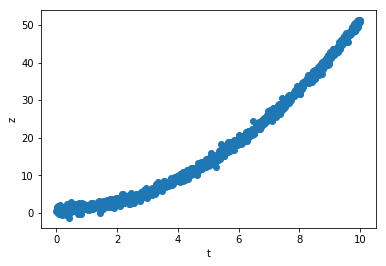

In [6]:
plt.scatter(df['t'],df['z'])
plt.xlabel('t')
plt.ylabel('z')
plt.show()

## Split into train and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['t']], df['z'], test_size=0.10, random_state=0)

## Scale the features

In [8]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## Train the model

In [9]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))

In [10]:
model.compile(loss='mse', optimizer=optimizers.SGD(lr=0.001))

## Train the model

In [11]:
history = model.fit(x_train_s, y_train, batch_size=1, epochs=10, validation_split=0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/10
810/810 [==============================] - 1s - loss: 61.2994 - val_loss: 4.2590
Epoch 2/10
810/810 [==============================] - 1s - loss: 2.4420 - val_loss: 1.2208
Epoch 3/10
810/810 [==============================] - 1s - loss: 1.0931 - val_loss: 0.9375
Epoch 4/10
810/810 [==============================] - 1s - loss: 0.8212 - val_loss: 0.8289
Epoch 5/10
810/810 [==============================] - 1s - loss: 0.7128 - val_loss: 0.6586
Epoch 6/10
810/810 [==============================] - 1s - loss: 0.6457 - val_loss: 0.6320
Epoch 7/10
810/810 [==============================] - 1s - loss: 0.6332 - val_loss: 0.5847
Epoch 8/10
810/810 [==============================] - 1s - loss: 0.5931 - val_loss: 0.6299
Epoch 9/10
810/810 [==============================] - 1s - loss: 0.5818 - val_loss: 0.7577
Epoch 10/10
810/810 [==============================] - 1s - loss: 0.5733 - val_loss: 0.5738


In [12]:
history.history.keys()

['loss', 'val_loss']

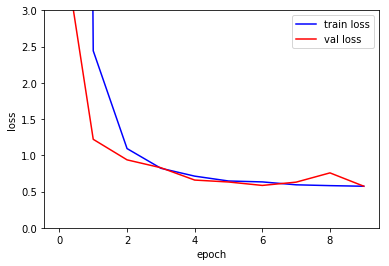

In [13]:
plt.plot(history.epoch,history.history['loss'],c='b',label='train loss')
plt.plot(history.epoch,history.history['val_loss'],c='r',label='val loss')
plt.ylabel('loss')
plt.ylim([0,3])
plt.xlabel('epoch')
plt.legend()
plt.show()

## Make predictions and evaluate the model

In [14]:
y_pred = model.predict(x_test_s)[:,0]

In [15]:
r2_score(y_test,y_pred)

0.9982069816794695

In [16]:
x_fine = np.linspace(0,1,100).reshape(-1,1)
y_fine = model.predict(x_fine)

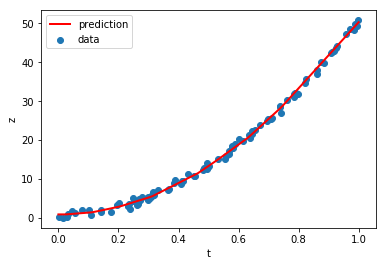

In [17]:
plt.scatter(x_test_s,y_test, label='data')
plt.plot(x_fine,y_fine,c='r',lw=2,label='prediction')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()
plt.show()

## Save and load the model

In [18]:
model.save('model.h5')

In [19]:
model2 = load_model('model.h5')

In [20]:
model2.predict(x_test_s)[:,0]

array([49.812492 , 38.41821  ,  5.1946163, 16.254557 , 23.511442 ,
       47.941788 ,  0.9095904,  3.5737197,  5.388156 , 25.921507 ,
       13.171191 , 16.535099 , 32.040817 ,  3.7672603, 17.657265 ,
        1.0825119, 42.414715 ,  2.4479258,  0.8970309,  1.2183788,
        0.9342935, 12.38187  ,  5.484926 ,  5.515009 , 40.458977 ,
       32.380943 ,  1.0207542,  1.3789487, 30.000051 ,  0.8970309,
       35.35706  , 26.205044 , 19.677164 , 32.55101  ,  9.301811 ,
       28.050205 , 46.751343 ,  7.662164 , 43.435093 ,  4.444649 ,
        3.5495272, 50.06759  , 20.91199  , 25.354433 ,  4.05757  ,
       31.955784 , 35.01693  ,  1.8964481,  5.7102046, 18.16224  ,
        6.295793 ,  5.122039 ,  4.323687 , 10.238752 , 38.67331  ,
       17.881697 ,  4.5656123,  4.5172267, 49.302296 ,  5.827322 ,
       17.152288 , 21.470137 ,  1.9121969,  2.8935761,  9.497007 ,
        2.7945428,  4.372072 , 15.020169 ,  4.0817623, 17.545046 ,
       28.192564 ,  5.218809 , 28.334925 ,  3.9608002, 44.1153